In [4]:
# import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

#from string import ascii_letters

In [8]:
df =pd.read_pickle('../pickle_pd/pd_top_25.pkl')
features = ['lep_pt_2','lep_pt_1','jet_n','lep_E_1','jet_pt_0','lep_eta_0','jet_pt_1','lep_pt_0','lep_E_2','lep_eta_1','lep_phi_1','lep_phi_0',
            'lep_ptcone30_1','lep_ptcone30_0','jet_eta_0','jet_m','lep_E_0','jet_eta_1','jet_pt_2','lep_pt_3','jet_E_0','lep_charge_1','lep_charge_0','lep_E_3']

In [9]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.2, random_state=42)
 X_test, X_val, y_test, y_val = train_test_split( X_test, y_test, test_size=0.5, random_state=42)

In [10]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [11]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, #eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [13]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

  0%|                              | 0/10 [00:00<?, ?trial/s, best loss=?]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7794357703904284                                                        
 10%|▎  | 1/10 [00:24<03:41, 24.62s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7783795202704                                                           
 20%|▌  | 2/10 [00:46<03:04, 23.09s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7792437249140597                                                        
 30%|▉  | 3/10 [01:13<02:52, 24.68s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7792629294616965                                                        
 40%|█▏ | 4/10 [01:37<02:27, 24.66s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7788212248660483                                                        
 50%|█▌ | 5/10 [01:59<01:57, 23.58s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7791477021758753                                                        
 60%|█▊ | 6/10 [02:23<01:34, 23.67s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7792437249140597                                                        
 70%|██ | 7/10 [02:46<01:10, 23.47s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7789748612471433                                                        
 80%|██▍| 8/10 [03:09<00:46, 23.38s/trial, best loss: -0.7794357703904284]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7795125885809759                                                        
 90%|██▋| 9/10 [03:34<00:23, 23.74s/trial, best loss: -0.7795125885809759]

/Users/ndueser/Documents/Niklas/ML_Seminar/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                    
0.7783411111751263                                                        
100%|██| 10/10 [03:55<00:00, 23.56s/trial, best loss: -0.7795125885809759]


In [14]:
best_hyperparams

{'colsample_bytree': 0.8866580175329654,
 'gamma': 5.382611073241503,
 'max_depth': 12.0,
 'min_child_weight': 7.0,
 'reg_alpha': 68.0,
 'reg_lambda': 0.15614822770506898}

In [25]:
xgb_model=xgb.XGBClassifier(
                    n_estimators =180, max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                    reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                    colsample_bytree=int(best_hyperparams['colsample_bytree']))         
xgb_model.fit(X_train[features],y_train,
             eval_set = [( X_train, y_train), ( X_test, y_test)])
y_pred = xgb_model.predict(X_val[features])

[0]	validation_0-mlogloss:1.03997	validation_1-mlogloss:1.04032
[1]	validation_0-mlogloss:1.00420	validation_1-mlogloss:1.00495
[2]	validation_0-mlogloss:0.99059	validation_1-mlogloss:0.99137
[3]	validation_0-mlogloss:0.98077	validation_1-mlogloss:0.98183
[4]	validation_0-mlogloss:0.96834	validation_1-mlogloss:0.96936
[5]	validation_0-mlogloss:0.94244	validation_1-mlogloss:0.94280
[6]	validation_0-mlogloss:0.92791	validation_1-mlogloss:0.92851
[7]	validation_0-mlogloss:0.88771	validation_1-mlogloss:0.88847
[8]	validation_0-mlogloss:0.85967	validation_1-mlogloss:0.86058
[9]	validation_0-mlogloss:0.82815	validation_1-mlogloss:0.82905
[10]	validation_0-mlogloss:0.80866	validation_1-mlogloss:0.80964
[11]	validation_0-mlogloss:0.78863	validation_1-mlogloss:0.78961
[12]	validation_0-mlogloss:0.78028	validation_1-mlogloss:0.78096
[13]	validation_0-mlogloss:0.76869	validation_1-mlogloss:0.76923
[14]	validation_0-mlogloss:0.73232	validation_1-mlogloss:0.73227
[15]	validation_0-mlogloss:0.72967	

[126]	validation_0-mlogloss:0.51282	validation_1-mlogloss:0.51079
[127]	validation_0-mlogloss:0.51270	validation_1-mlogloss:0.51066
[128]	validation_0-mlogloss:0.51261	validation_1-mlogloss:0.51055
[129]	validation_0-mlogloss:0.51239	validation_1-mlogloss:0.51035
[130]	validation_0-mlogloss:0.51238	validation_1-mlogloss:0.51034
[131]	validation_0-mlogloss:0.51189	validation_1-mlogloss:0.50983
[132]	validation_0-mlogloss:0.51179	validation_1-mlogloss:0.50976
[133]	validation_0-mlogloss:0.51166	validation_1-mlogloss:0.50963
[134]	validation_0-mlogloss:0.51154	validation_1-mlogloss:0.50951
[135]	validation_0-mlogloss:0.51149	validation_1-mlogloss:0.50948
[136]	validation_0-mlogloss:0.51133	validation_1-mlogloss:0.50934
[137]	validation_0-mlogloss:0.51090	validation_1-mlogloss:0.50895
[138]	validation_0-mlogloss:0.51065	validation_1-mlogloss:0.50866
[139]	validation_0-mlogloss:0.51061	validation_1-mlogloss:0.50860
[140]	validation_0-mlogloss:0.51022	validation_1-mlogloss:0.50824
[141]	vali

In [33]:
history  = xgb_model.evals_result()

In [37]:
history.keys()

dict_keys(['validation_0', 'validation_1'])

In [44]:
history['validation_0']

OrderedDict([('mlogloss',
              [1.0399692002773844,
               1.00419866181396,
               0.9905929694253238,
               0.9807697981072296,
               0.9683387530185,
               0.9424370312609233,
               0.9279077953881256,
               0.8877055154391522,
               0.8596715273170508,
               0.8281522927193247,
               0.8086586603957341,
               0.7886323518127453,
               0.7802785871180438,
               0.7686939942614591,
               0.7323234835028886,
               0.7296653050064387,
               0.7210796791732469,
               0.7065456719139472,
               0.6998802014790566,
               0.6958727798149587,
               0.688824408178666,
               0.683929603199748,
               0.6741873208323159,
               0.6733986114337582,
               0.666424404264281,
               0.6625964438918933,
               0.6611929366711541,
               0.6603340957213669,
  

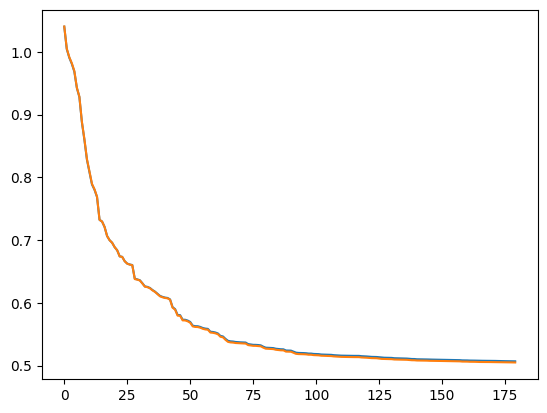

In [45]:
plt.plot(history['validation_0']['mlogloss'], label='train')
plt.plot(history['validation_1']['mlogloss'], label='test')

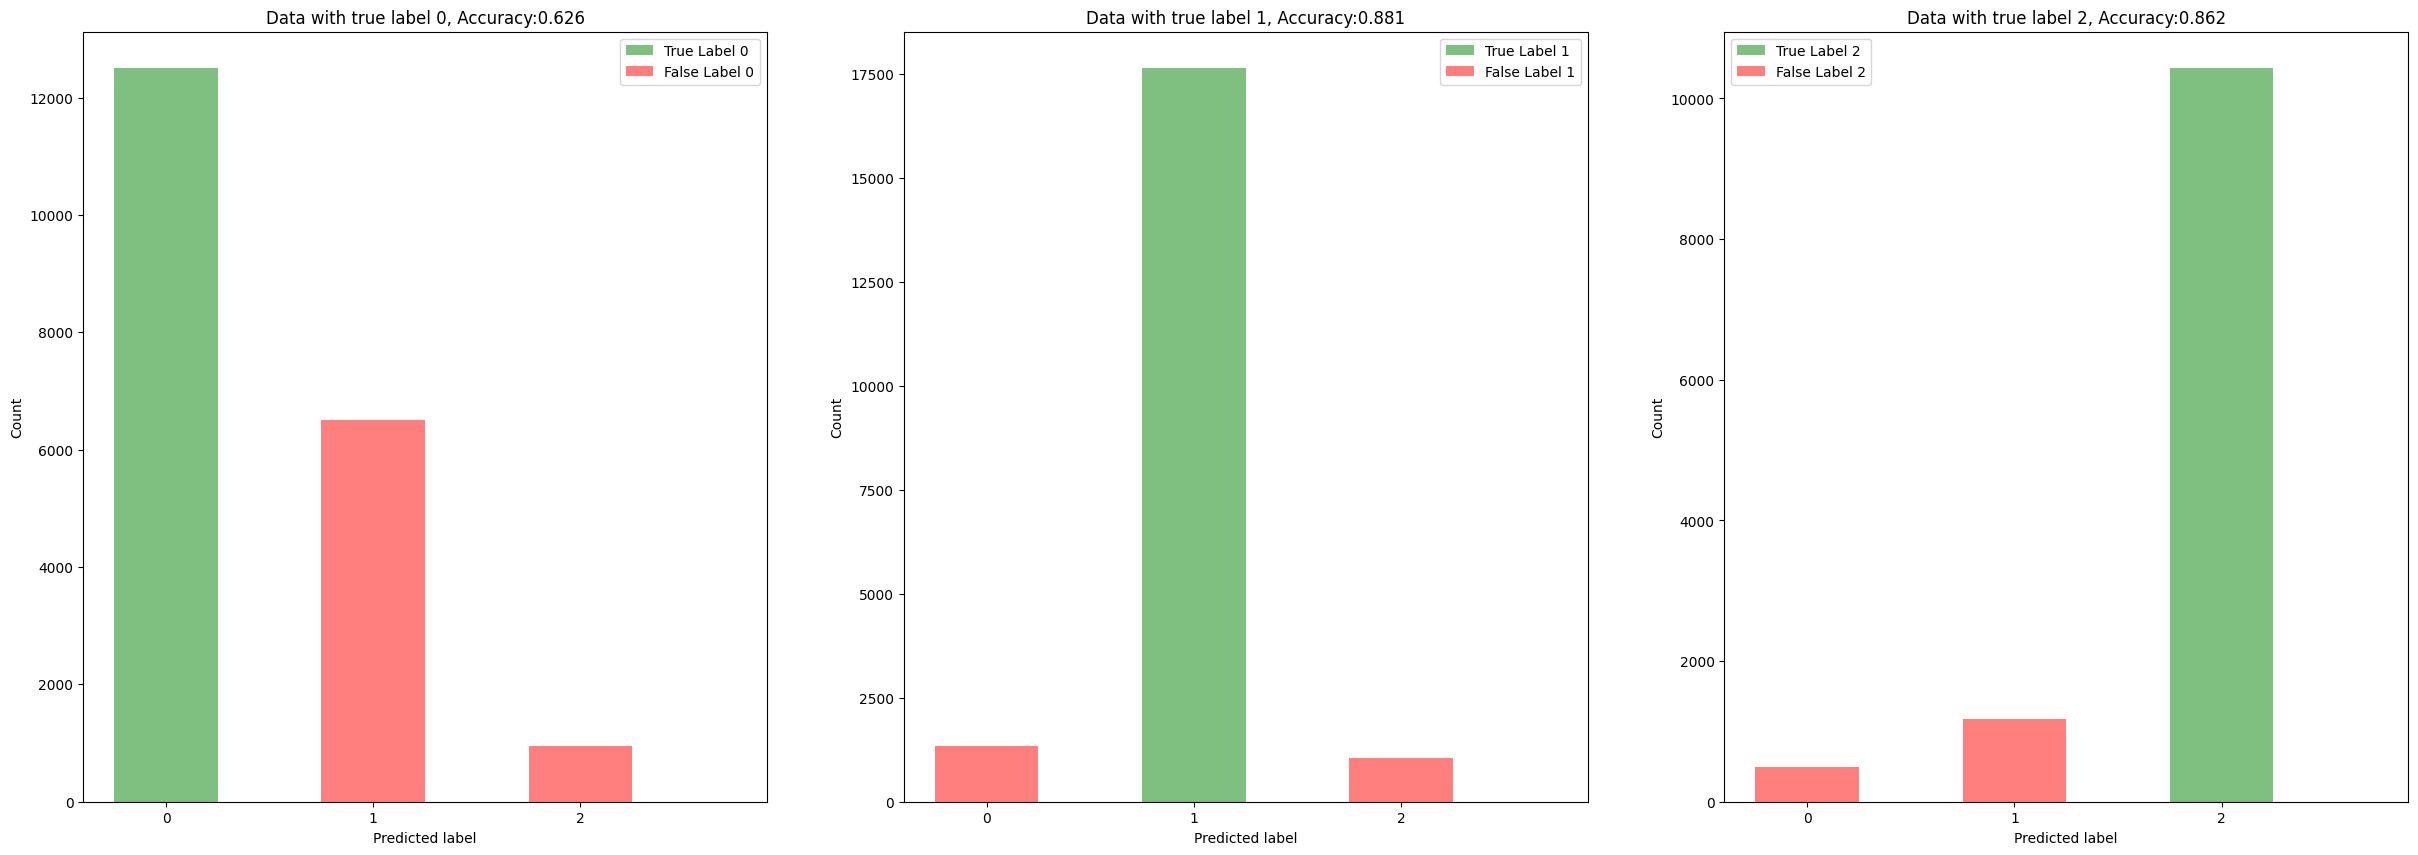

In [19]:
bins = [-0.25, 0.75, 1.75, 2.75] 
fig, ax = plt.subplots(1,3, figsize = (30,10))
for i, label in enumerate(range(3)):
    test_label = y_val[y_val==label]
    pred_label = y_pred[y_val==label]
    true_label = pred_label[pred_label == test_label]
    false_label= pred_label[pred_label != test_label]
    #print(len(false_label))
    ax[i].hist(true_label , bins = bins, histtype = 'barstacked', alpha=0.5, label='True Label ' + str(label), align = 'mid', width = 0.5, color = 'green')
    ax[i].hist(false_label, bins = bins, histtype = 'barstacked', alpha=0.5, label='False Label ' + str(label), align = 'mid', width = 0.5, color = 'red')
    #ax[i] = plt.xlabel('label')
    ax[i].set_title(f'Data with true label {i}, Accuracy:{accuracy_score(test_label, pred_label):.3f}')
    ax[i].set_xlabel(xlabel = f'Predicted label')
    ax[i].set_ylabel('Count')
    ax[i].legend()
    ax[i].set_xticks(range(3))

#plt.legend()
#plt.xlim(-0.5, 2.5)
#plt.xticks(range(3)) 